# Libraries


In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import janitor as jn

sns.set_style("dark")


# Objective


This challenge is about the Ames Housing Dataset, and we want to predict the sale price of a house, given some information about it. I'll perform some exploratory data analysis here, and after we'll go to the modeling step.


# Data


In [183]:
data = pd.read_csv("data/base.csv")


In [184]:
data.columns


Index(['Id', 'ClasseImovel', 'ClasseZona', 'Fachada', 'TamanhoLote', 'Rua',
       'Beco', 'FormaProp', 'PlanoProp', 'Servicos', 'ConfigLote',
       'InclinacaoLote', 'Bairro', 'Estrada1', 'Estrada2', 'TipoHabitacao',
       'EstiloHabitacao', 'Qualidade', 'Condicao', 'AnoConstrucao',
       'AnoReforma', 'TipoTelhado', 'MaterialTelhado', 'Exterior1',
       'Exterior2', 'TipoAlvenaria', 'AreaAlvenaria', 'QualidadeCobertura',
       'CondicaoExterna', 'TipoFundacao', 'AlturaPorao', 'CondicaoPorao',
       'ParedePorao', 'TipoAcabPorao1', 'AreaAcabPorao1', 'TipoAcabPorao2',
       'AreaAcabPorao2', 'AreaInacabPorao', 'AreaPorao', 'Aquecimento',
       'QualidadeAquecimento', 'ArCentral', 'InstalacaoEletrica', 'AreaTerreo',
       'Area2Andar', 'BaixaQualiAreaAcab', 'AreaConstruida', 'BanheiroPorao',
       'LavaboPorao', 'Banheiro', 'Lavabo', 'BedroomAbvGr', 'KitchenAbvGr',
       'QualidadeCozinha', 'TotalQuartos', 'Funcionalidade', 'Lareira',
       'QualdiadeLareira', 'LocalGaragem'

# Entendendo o dataset


## Target Variable


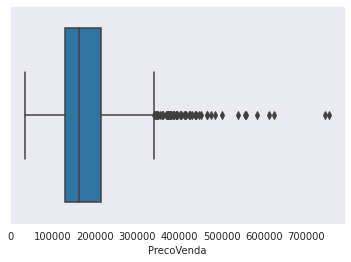

In [185]:
# our target is PrecoVenda
_ = sns.boxplot(x="PrecoVenda", data=data)
plt.show()


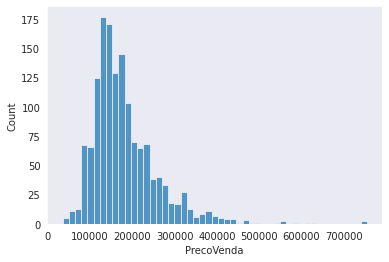

In [186]:
_ = sns.histplot(x="PrecoVenda", data=data)
plt.show()


In [187]:
# some stats about our target variable
print(data["PrecoVenda"].describe(percentiles=[0.10, 0.25, 0.50, 0.75, 0.99]))
print("Media: ", data["PrecoVenda"].median())


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
10%      106475.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
99%      442567.010000
max      755000.000000
Name: PrecoVenda, dtype: float64
Media:  163000.0


Here we're seeing that there is a **mean price of $180,921.20** with a range that goes from **$35k until $755k**. Besides that, our data is negative skewed, meaning that we have more data left side of the distribution than the other side.

Actually, 99% of our data goes under $443k.


## Missing variables


<AxesSubplot:>

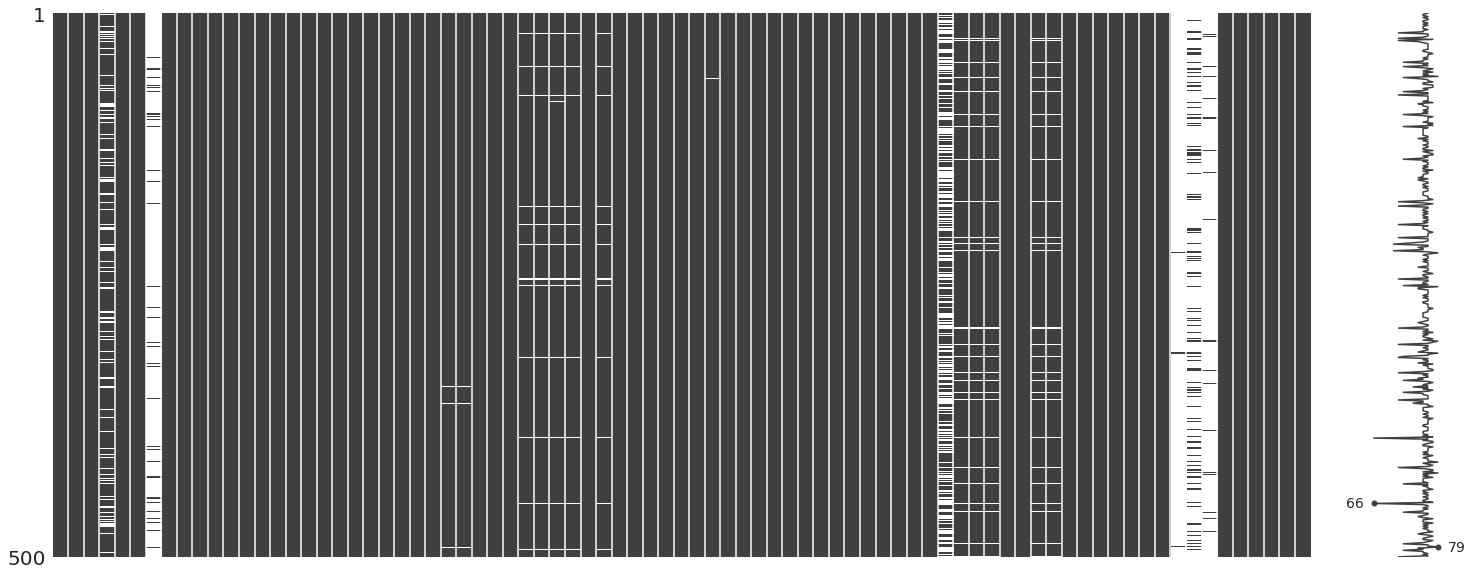

In [188]:
# using missingno library to investigate the missing values
msno.matrix(data.sample(500))


Here every white line represent a missing value. As we have 81 variables, the library doesn't show the name of those, but we can see that some missings are related. We can investigate the correlation of those missings, first looking just for the variables that have missings, let's do this with the bar plot.


<AxesSubplot:>

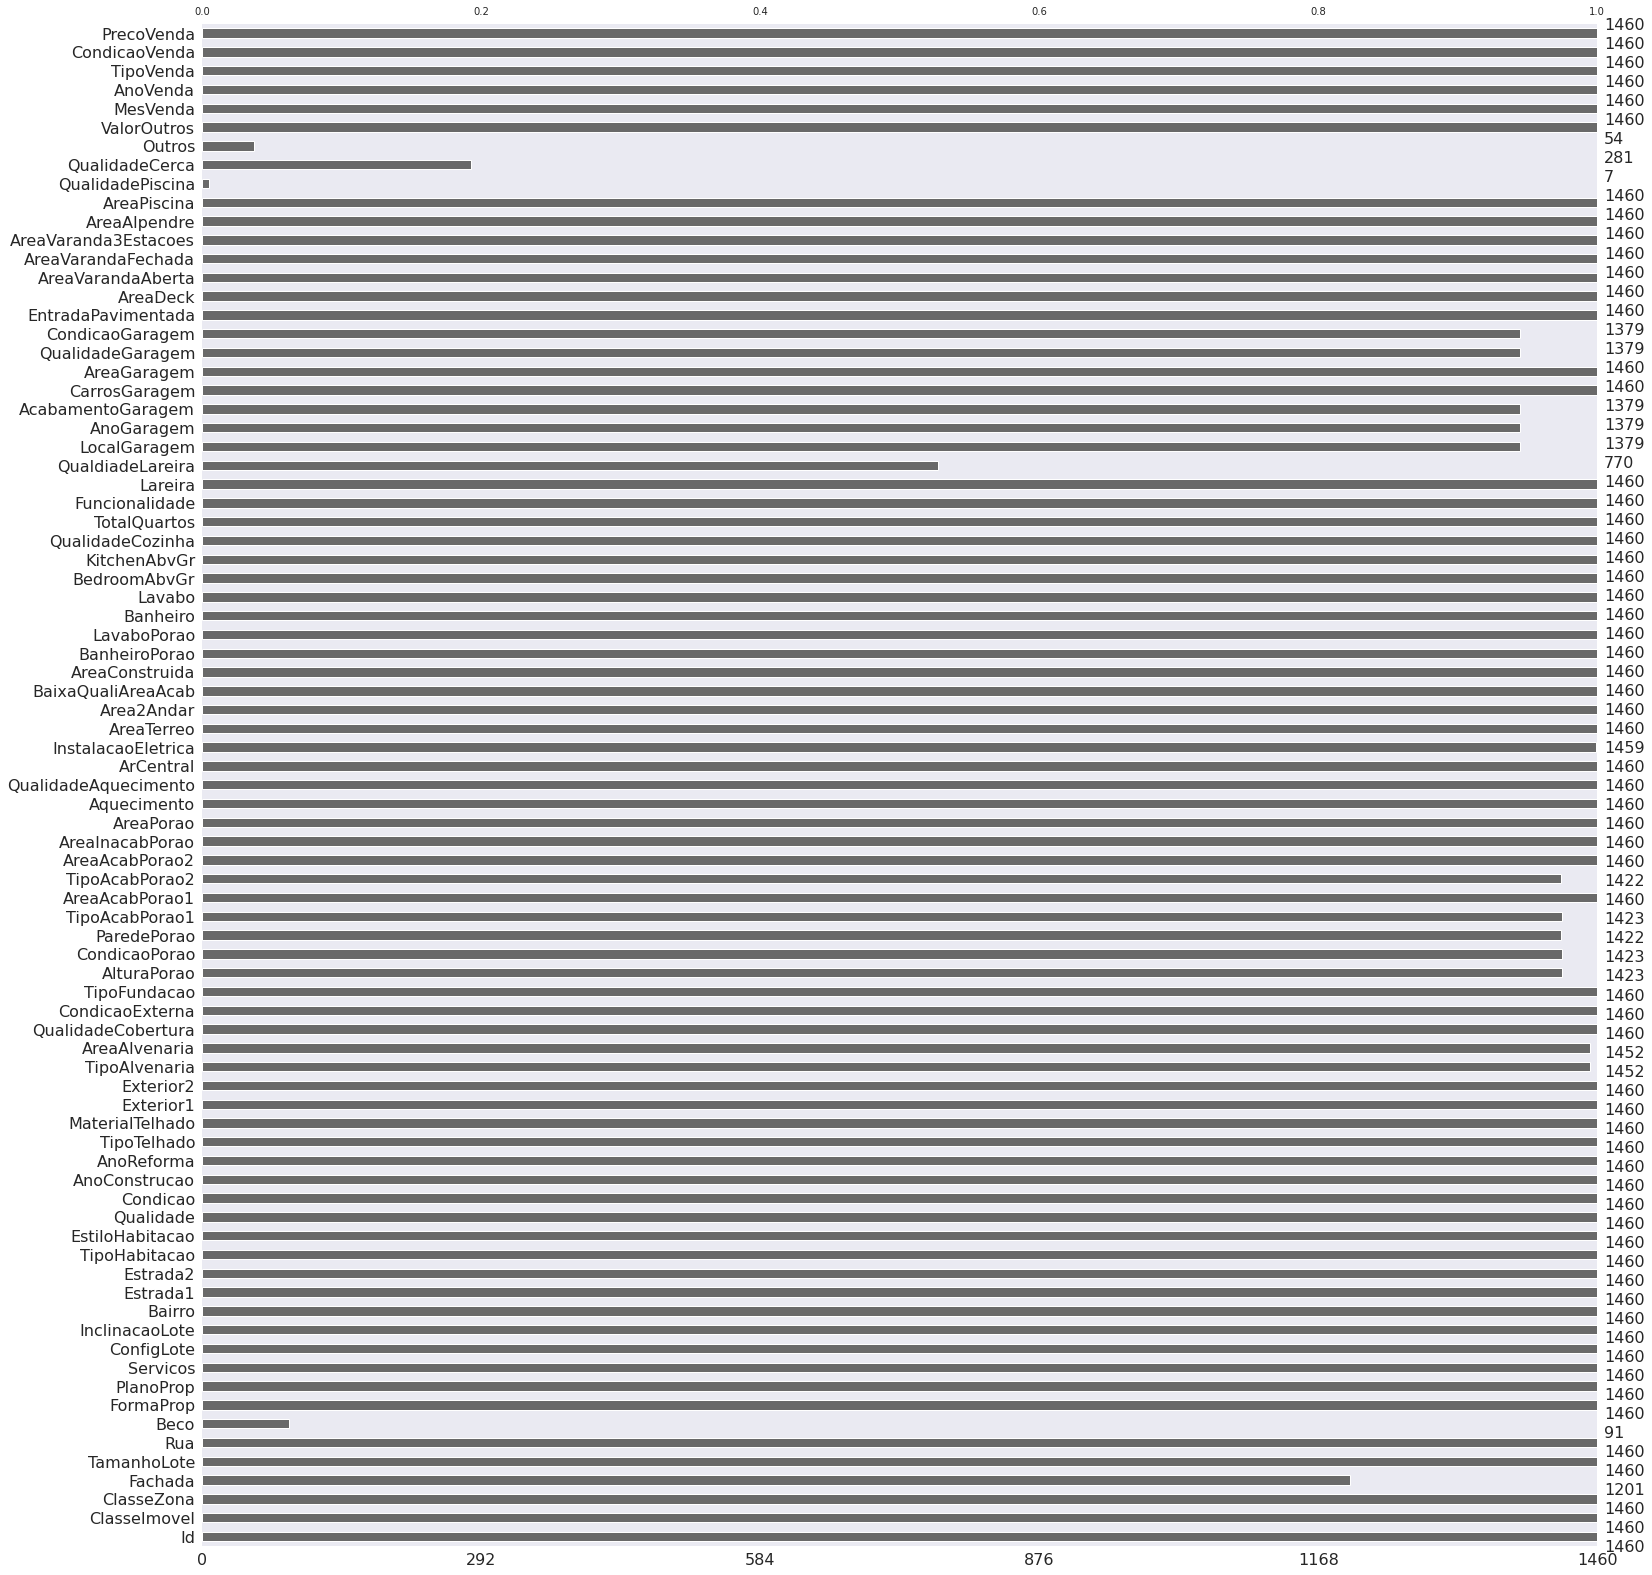

In [189]:
msno.bar(data)


In [190]:
data_missing = data[data.columns[data.isnull().any()]]


<AxesSubplot:>

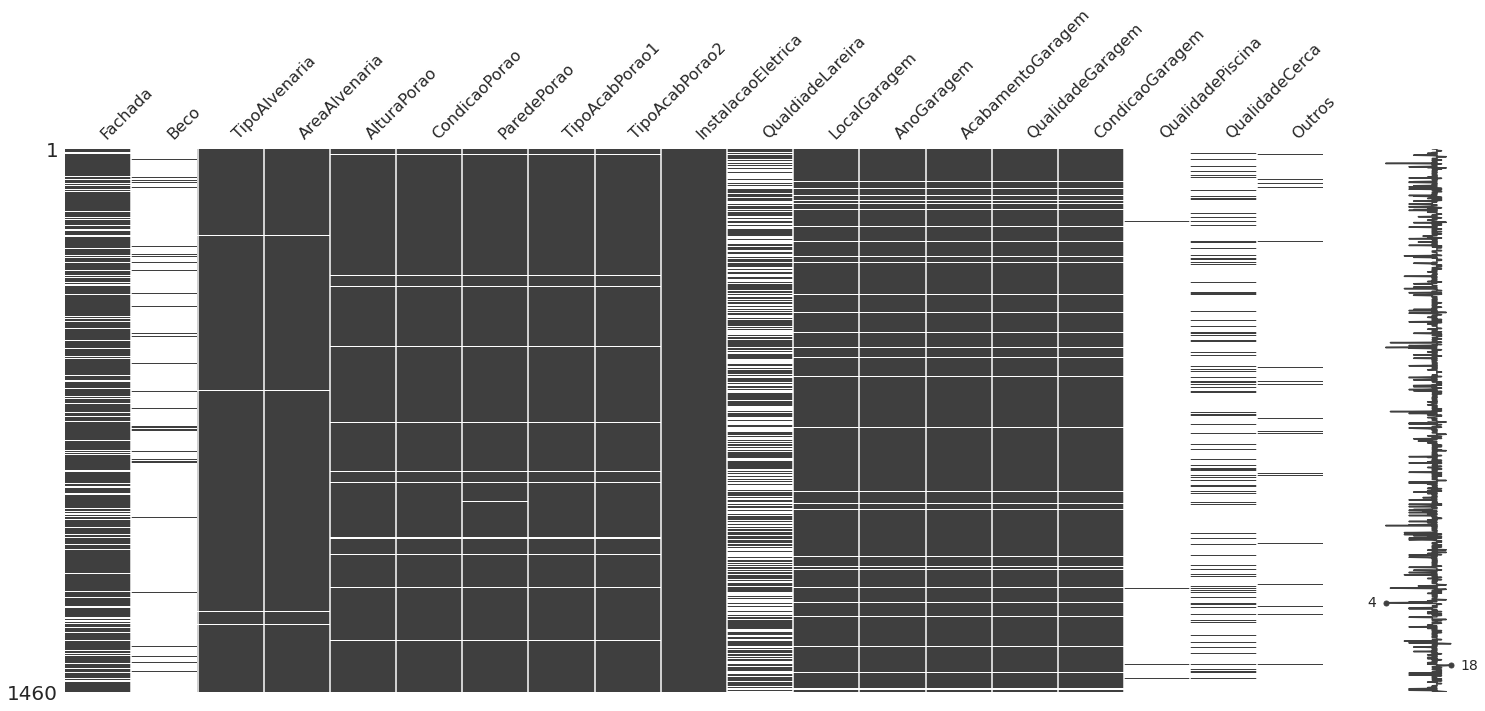

In [191]:
msno.matrix(data_missing)


Now is easy to see that we have a lot of correlated missing. But looking at the data dictionary, we see that those missing are just another category of the variable.

Let's substitute those missings with the respective category and go back and analyse the missings.


In [192]:
# looking at the types of the missing variables
data_missing.dtypes


Fachada               float64
Beco                   object
TipoAlvenaria          object
AreaAlvenaria         float64
AlturaPorao            object
CondicaoPorao          object
ParedePorao            object
TipoAcabPorao1         object
TipoAcabPorao2         object
InstalacaoEletrica     object
QualdiadeLareira       object
LocalGaragem           object
AnoGaragem            float64
AcabamentoGaragem      object
QualidadeGaragem       object
CondicaoGaragem        object
QualidadePiscina       object
QualidadeCerca         object
Outros                 object
dtype: object

As I told before, those missing are actually a category of the categoric variable. But some numerical variables are related to the categorical one (AreaAlvenaria e AnoGaragem).

As there is no Alvenaria, there is no Area, and as there is no Garagem, there is no building year for that garagem.


In [193]:
# replacing missing
cond_to_replace = {
    "Beco": np.nan,
    "AlturaPorao": np.nan,
    "CondicaoPorao": np.nan,
    "ParedePorao": np.nan,
    "TipoAcabPorao1": np.nan,
    "TipoAcabPorao2": np.nan,
    "InstalacaoEletrica": np.nan,
    "QualdiadeLareira": np.nan,
    "LocalGaragem": np.nan,
    "AcabamentoGaragem": np.nan,
    "QualidadeGaragem": np.nan,
    "CondicaoGaragem": np.nan,
    "QualidadePiscina": np.nan,
    "QualidadeCerca": np.nan,
    "Outros": np.nan,
}

value_to_replace = {
    "Beco": "sem_beco",
    "AlturaPorao": "sem_porao",
    "CondicaoPorao": "sem_porao",
    "ParedePorao": "sem_porao",
    "TipoAcabPorao1": "sem_porao",
    "TipoAcabPorao2": "sem_porao",
    "QualdiadeLareira": "sem_lareira",
    "LocalGaragem": "sem_garagem",
    "AcabamentoGaragem": "sem_garagem",
    "QualidadeGaragem": "sem_garagem",
    "CondicaoGaragem": "sem_garagem",
    "QualidadePiscina": "sem_piscina",
    "QualidadeCerca": "sem_cerca",
    "Outros": "nenhum",
}

data = data.replace(cond_to_replace, value_to_replace)


In [194]:
# recreating the missing dataset to check again for columns with missing
data_missing = data[data.columns[data.isnull().any()]]


<AxesSubplot:>

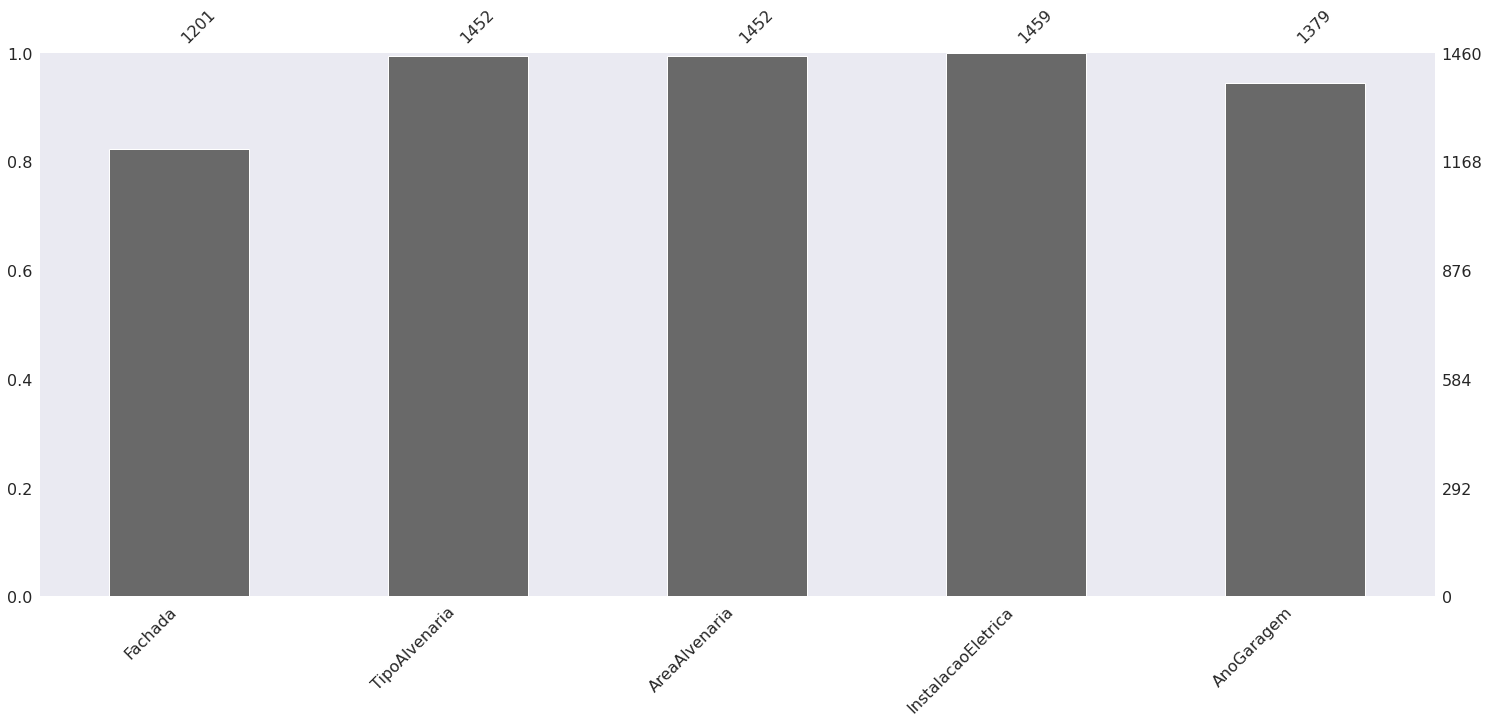

In [195]:
msno.bar(data_missing)


In [196]:
data_missing["InstalacaoEletrica"].value_counts()


SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: InstalacaoEletrica, dtype: int64

We're seeing here that most part of the installation is `SBrKr`, so lets input the missing with that.


In [197]:
data = data.replace({"InstalacaoEletrica": np.nan}, {"InstalacaoEletrica": "SBrkr"})


In [198]:
# we'll not use this variable, at least as predictor
# but may be useful to look at the evolution of garages on the history
len(data_missing["AnoGaragem"].unique())


98

In [199]:
data_missing["AreaAlvenaria"]


0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: AreaAlvenaria, Length: 1460, dtype: float64

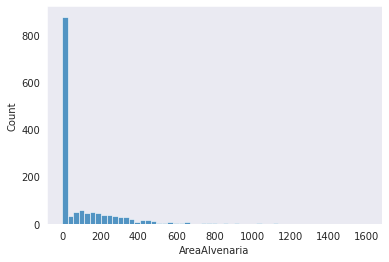

In [200]:
_ = sns.histplot(x="AreaAlvenaria", data=data_missing)
plt.show()


For TipoAlvenaria and AreaAlvenaria, I'll consider that the missing is just another case where there is no Alvenaria, and put the area as 0.0, like already happen.


In [201]:
data = data.replace(
    {"AreaAlvenaria": np.nan, "TipoAlvenaria": np.nan},
    {"AreaAlvenaria": 0.0, "TipoAlvenaria": "None"},
)


In [202]:
data_classe_zona_describe = data.groupby(["ClasseZona"])["Fachada"].agg({"mean", np.median}).reset_index()
data_classe_zona_describe 

,ClasseZona,mean,median
0,C (all),69.700000,60.0
1,FV,59.491228,65.0
2,RH,58.923077,60.0
3,RL,74.680043,72.0
4,RM,52.366834,51.0


In [203]:
data["ClasseZona"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: ClasseZona, dtype: int64

In [204]:
data.loc[data["Fachada"].isna(), ["ClasseZona", "Fachada"]]

,ClasseZona,Fachada
7,RL,NaN
12,RL,NaN
14,RL,NaN
16,RL,NaN
24,RL,NaN
...,...,...
1429,RL,NaN
1431,RL,NaN
1441,RM,NaN
1443,RL,NaN


We see that on `Fachada` we have four of the `ClasseZona`. We can impute conditionally based on that. 

In [205]:
def get_median(classe_zona: str):
    median = data_classe_zona_describe[data_classe_zona_describe["ClasseZona"] == classe_zona]["median"].values[0]
    return median

In [206]:
classe_zona_list = ["RL", "RM", "FV", "RH"]

for classe_zona in classe_zona_list:
    median = get_median(classe_zona)
    data.loc[(data["Fachada"].isna()) & (data["ClasseZona"] == classe_zona), "Fachada"] = median



In [207]:
data.loc[data["Fachada"].isna(), ["ClasseZona", "Fachada"]]

,ClasseZona,Fachada


In [209]:
# the last column with missing values
data_missing = data[data.columns[data.isnull().any()]]
data_missing.columns


Index(['AnoGaragem'], dtype='object')

In [210]:
data["AnoGaragem"]

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: AnoGaragem, Length: 1460, dtype: float64

In [211]:
# exporting data after the missing handling
data.to_csv("data/curated/db_c1.csv", index=False)